In [1]:
import pandas as pd
import datetime as dt
import seaborn 
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv(r"D:\Device_anomaly_new\filtered_data\filtereddata.csv")

In [3]:
df.groupby('equipmentNumber').measuredAt.count()

equipmentNumber
490278       736
531224       790
591945      3286
687589       418
687590      3697
826188      1572
826189       615
933474       967
933475      1413
936305       662
1205837     4142
1389624     3340
1391075     1294
1403113      567
1486559     5954
1702989     3244
1708208     2557
1708209     2731
1751400    29422
1792283     1805
Name: measuredAt, dtype: int64

In [4]:
df_1751400 = df[df['equipmentNumber']==1751400]

In [5]:
list(df_1751400.columns)

['equipmentNumber',
 'measuredAt',
 'P_x_.Hou_OperatingCPCPump',
 'P_x_.Hou_OperatingLastService',
 'P_x_.Hou_OperatingRD',
 'P_x_.Hou_OperatingRDPump',
 'P_x_.Hou_OperatingTotal',
 'P_x_.t_TemperatureElectronicBoardSet',
 'P_x_.t_TemperaturePND1Set',
 'P_x_.t_TemperatureSampleLineSet',
 'P_x_.t_TemperatureTECSet',
 'P_x_.t_TemperatureVPRSet',
 'P_x_APCGHNumber',
 'P_x_APCMode',
 'P_x_ActualPCRF1_MFR',
 'P_x_ActualPCRF2_MFR',
 'P_x_ActualPCRF3_MFR',
 'P_x_ActualPCRF4_MFR',
 'P_x_ActualPCRF5_MFR',
 'P_x_ActualPCRF6_MFR',
 'P_x_ActualPCRF7_MFR',
 'P_x_Actual_PND1_High_10_MFR',
 'P_x_Actual_PND1_High_15_MFR',
 'P_x_Actual_PND1_High_20_MFR',
 'P_x_Actual_PND1_Low_10_MFR',
 'P_x_Actual_PND1_Low_15_MFR',
 'P_x_Actual_PND1_Low_20_MFR',
 'P_x_AppMode',
 'P_x_CPCFirmwareVersion',
 'P_x_CPCInletPressureLimit',
 'P_x_CPCModel',
 'P_x_CPCPumpSwitch',
 'P_x_CPCSerial',
 'P_x_CPCSrvAutoFill',
 'P_x_CPCSrvCoincidenceCorrection',
 'P_x_CPCSrvDrainValve',
 'P_x_CPCSrvWaterRemoval',
 'P_x_CPCType',
 'P_

In [6]:
df_1751400['Z_y_Status'].unique()

array([ 2.,  1., nan])

In [11]:
df_know_data = pd.read_excel(r"D:\Device_anomaly_new\AVLAPC.xlsx") 
# df_1751400["Y_y_FlowPND1"].head() 
df_know_data

,Channel name,Descriptive name,Value,Min.,Max.,Default,Unit,State
0,Y_y_ParticlesPerCcm,Conc. PNC,0,0.0,50000.0,0,p/ccm,5
1,Y_y_DilutedParticlesPerCcm,Conc. PCRF Corr.,0,-inf,inf,0,p/ccm,5
2,Y_y_ParticlesIntegPerCcm,Integ. Conc. PNC,0,0.0,10000.0,0,p/ccm,5
3,Y_y_ParticlesIntegPerCcmExp,Integ. Conc. PNC (exp.),0,NaN,NaN,Value Undefined,p/ccm,5
4,Y_y_ParticlesIntegMeanPerCcm,Mean Conc. PNC,0,0.0,10000.0,0,p/ccm,5
...,...,...,...,...,...,...,...,...
335,Y_r_SpanCheckTestRelDeviation,Span Check Test Rel. Deviation,Value Undefined,-inf,inf,Value Undefined,%,1
336,Y_c_BuildNumber,Build Number,144,0.0,inf,0,No Unit,5
337,Y_c_BuildDate,Build Date,Aug__4_2015,NaN,NaN,Value Undefined,No Unit,5
338,Y_c_BuildTime,Build Time,11:57:13,NaN,NaN,Value Undefined,No Unit,5


In [8]:
df_1751400_SMGA = df_1751400[df_1751400.Z_y_Status == 2]

In [9]:
df_1751400_SMGA.shape 

(29032, 363)

In [10]:
df_1751400_SMGA.columns 

Index(['equipmentNumber', 'measuredAt', 'P_x_.Hou_OperatingCPCPump',
       'P_x_.Hou_OperatingLastService', 'P_x_.Hou_OperatingRD',
       'P_x_.Hou_OperatingRDPump', 'P_x_.Hou_OperatingTotal',
       'P_x_.t_TemperatureElectronicBoardSet', 'P_x_.t_TemperaturePND1Set',
       'P_x_.t_TemperatureSampleLineSet',
       ...
       'Y_r_RefResponseCheckResult', 'Y_r_RefResponseCheckResultFlag',
       'Y_y_.U_Voltage1AnalogInterfaceBoard_13V',
       'Y_y_.U_Voltage2AnalogInterfaceBoard_m13V',
       'Y_y_.U_VoltageHetingLine_48V', 'Y_y_.U_VoltageMFCConditioning_24V',
       'Y_y_APCGeneration', 'Y_y_OptSampleLineHeated_2m',
       'Y_y_OptSampleLineHeated_5m', 'Unnamed: 0'],
      dtype='object', length=363)

In [419]:
df_1751400_SMGA.drop(['Y_c_BuildTime','P_x_APCGHNumber','P_x_SerialNumber','Y_c_BuildDate','Y_y_CPCButanolState','Y_y_CPCStatus','Y_y_PND1Mode','Y_y_ParticlesPerCcm','Y_y_RefCPCStatus','Y_y_RefDilutedParticlesPerCcm','Z_y_StatusFull','Z_y_TransitionStatus','Z_y_UserFull'],axis=1,inplace=True)

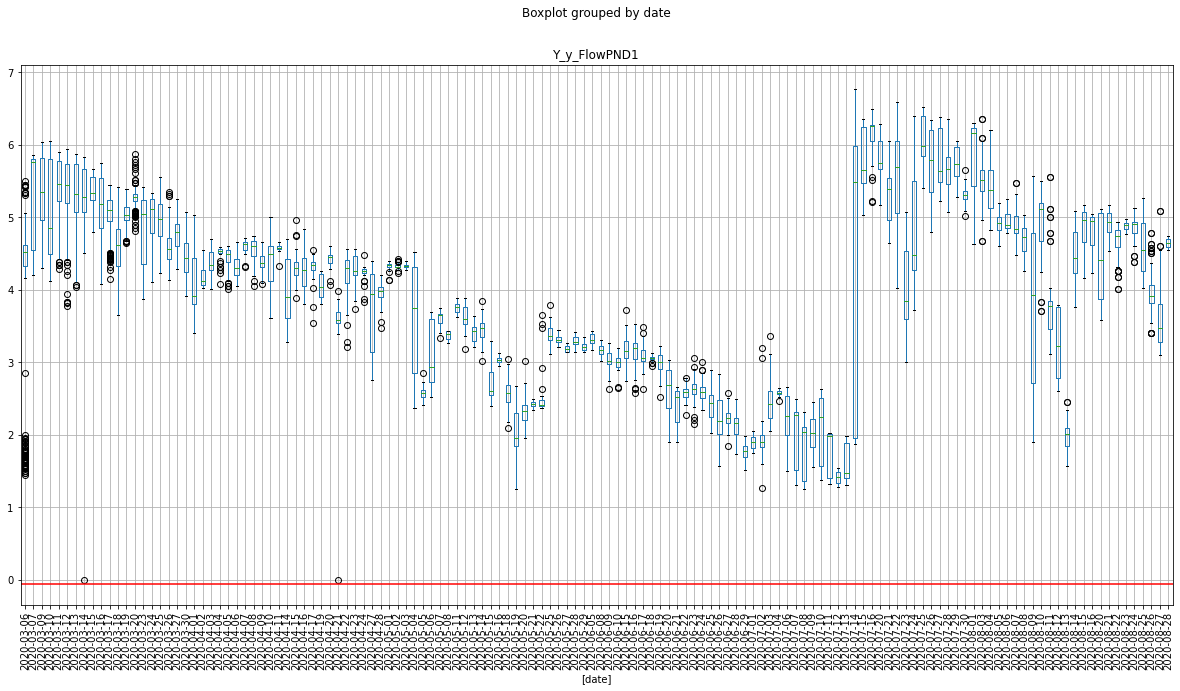

In [420]:
df_1751400_SMGA['measuredAt'] = pd.to_datetime(df_1751400_SMGA['measuredAt'])
df_1751400_SMGA['date'] = df_1751400_SMGA['measuredAt'].dt.date 

df_1751400_SMGA.boxplot(column=['Y_y_FlowPND1'], by=['date'], figsize = (20,10),rot=90)
plt.axhline(-0.05, c='r') 

#plt.axhline(5000, c='r')  

In [424]:
l1 = list(df_1751400_SMGA.columns)

['equipmentNumber',
 'measuredAt',
 'P_x_.Hou_OperatingCPCPump',
 'P_x_.Hou_OperatingLastService',
 'P_x_.Hou_OperatingRD',
 'P_x_.Hou_OperatingRDPump',
 'P_x_.Hou_OperatingTotal',
 'P_x_.t_TemperatureElectronicBoardSet',
 'P_x_.t_TemperaturePND1Set',
 'P_x_.t_TemperatureSampleLineSet',
 'P_x_.t_TemperatureTECSet',
 'P_x_.t_TemperatureVPRSet',
 'P_x_APCMode',
 'P_x_ActualPCRF1_MFR',
 'P_x_ActualPCRF2_MFR',
 'P_x_ActualPCRF3_MFR',
 'P_x_ActualPCRF4_MFR',
 'P_x_ActualPCRF5_MFR',
 'P_x_ActualPCRF6_MFR',
 'P_x_ActualPCRF7_MFR',
 'P_x_Actual_PND1_High_10_MFR',
 'P_x_Actual_PND1_High_15_MFR',
 'P_x_Actual_PND1_High_20_MFR',
 'P_x_Actual_PND1_Low_10_MFR',
 'P_x_Actual_PND1_Low_15_MFR',
 'P_x_Actual_PND1_Low_20_MFR',
 'P_x_AppMode',
 'P_x_CPCFirmwareVersion',
 'P_x_CPCInletPressureLimit',
 'P_x_CPCModel',
 'P_x_CPCPumpSwitch',
 'P_x_CPCSerial',
 'P_x_CPCSrvAutoFill',
 'P_x_CPCSrvCoincidenceCorrection',
 'P_x_CPCSrvDrainValve',
 'P_x_CPCSrvWaterRemoval',
 'P_x_CPCType',
 'P_x_Calibration_P_Abso

In [425]:
chnl_list = l1[2:(len(l1)-1)] 

In [433]:
out_of_range_df_1751400 = pd.melt(df_1751400_SMGA, id_vars =['equipmentNumber'], value_vars = chnl_list) 
out_of_range_df_1751400.rename(columns={'variable':'Channel name'},inplace=True)
out_of_range_df_1751400 = out_of_range_df_1751400.merge(df_know_data, on = 'Channel name')

out_of_range_df_1751400['flag'] = None
out_of_range_df_1751400['flag'] = np.where((out_of_range_df_1751400['value'] < out_of_range_df_1751400[out_of_range_df_1751400.columns[5]]) | (out_of_range_df_1751400['value'] > out_of_range_df_1751400[out_of_range_df_1751400.columns[6]]),1,0) 
out_of_range_df_1751400.dropna(subset=[out_of_range_df_1751400.columns[5], out_of_range_df_1751400.columns[6]]) 
out_of_range_df_1751400.head()

,equipmentNumber,Channel name,value,Descriptive name,Value,Min.,Max.,Default,Unit,State,flag
0,1751400,P_x_.Hou_OperatingCPCPump,1474,PNC Pump,3296,0.0,65000.0,1000,h,5,0
1,1751400,P_x_.Hou_OperatingCPCPump,1475,PNC Pump,3296,0.0,65000.0,1000,h,5,0
2,1751400,P_x_.Hou_OperatingCPCPump,1475,PNC Pump,3296,0.0,65000.0,1000,h,5,0
3,1751400,P_x_.Hou_OperatingCPCPump,1475,PNC Pump,3296,0.0,65000.0,1000,h,5,0
4,1751400,P_x_.Hou_OperatingCPCPump,1475,PNC Pump,3296,0.0,65000.0,1000,h,5,0


In [434]:
l=out_of_range_df_1751400.groupby(by=["Channel name","flag"])["value"].count()
l= pd.DataFrame(l)

l=l.reset_index(["Channel name","flag"])
l.shape

(330, 3)

In [435]:
l2 = l.pivot_table('value',['Channel name'],'flag')

In [436]:
pd.set_option('display.max_columns',None) 
pd.set_option('display.max_rows',None) 
l2

flag,0,1
Channel name,,
P_x_.Hou_OperatingCPCPump,29032.0,NaN
P_x_.Hou_OperatingLastService,29032.0,NaN
P_x_.Hou_OperatingRD,29032.0,NaN
P_x_.Hou_OperatingRDPump,29032.0,NaN
P_x_.Hou_OperatingTotal,29032.0,NaN
P_x_.t_TemperatureElectronicBoardSet,29032.0,NaN
P_x_.t_TemperaturePND1Set,29032.0,NaN
P_x_.t_TemperatureSampleLineSet,29031.0,NaN
P_x_.t_TemperatureTECSet,29031.0,NaN


In [443]:
x = l2.dropna().reset_index()

In [444]:
x

flag,Channel name,0,1
0,P_x_DRStep1,0.0,29031.0
1,P_x_DRStep2,0.0,29031.0
2,P_x_DRStep3,0.0,29031.0
3,Y_y_CPCConcentration,28359.0,671.0
4,Y_y_CPCType,0.0,29027.0
5,Y_y_LastCalibrationYear_GAS,0.0,29027.0
6,Y_y_LastCalibrationYear_KGA,0.0,29027.0
7,Y_y_MasterCalibrationYear_GAS,0.0,29027.0
8,Y_y_MasterCalibrationYear_KGA,0.0,29027.0
9,Y_y_RDDiskFrequency,29030.0,2.0


In [446]:
x = pd.melt(x, id_vars =['Channel name'], value_vars =[0, 1]) 

In [447]:
x

,Channel name,flag,value
0,P_x_DRStep1,0,0.0
1,P_x_DRStep2,0,0.0
2,P_x_DRStep3,0,0.0
3,Y_y_CPCConcentration,0,28359.0
4,Y_y_CPCType,0,0.0
5,Y_y_LastCalibrationYear_GAS,0,0.0
6,Y_y_LastCalibrationYear_KGA,0,0.0
7,Y_y_MasterCalibrationYear_GAS,0,0.0
8,Y_y_MasterCalibrationYear_KGA,0,0.0
9,Y_y_RDDiskFrequency,0,29030.0


In [451]:
x.columns

Index(['Channel name', 'flag', 'value'], dtype='object')

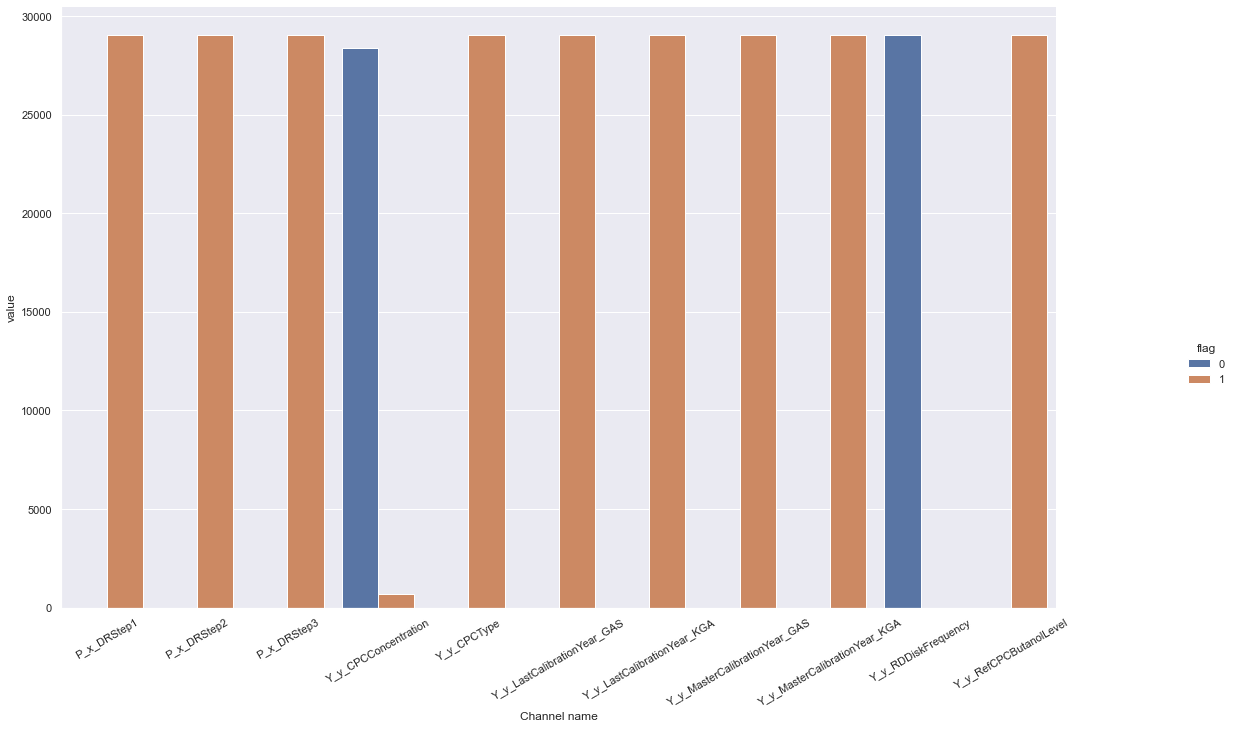

In [491]:
import seaborn as sns
from matplotlib import pyplot
g=sns.catplot(x="Channel name",y="value",hue="flag",kind="bar", data=x) 
g.fig.set_figwidth(20)
g.fig.set_figheight(10)
g.set_xticklabels(rotation=30)


In [313]:
out_of_range_df_1751400_SMGA_1 = pd.melt(df_1751400_SMGA, id_vars =['equipmentNumber'], value_vars = chnl_list[0:50])  
out_of_range_df_1751400_SMGA_1.rename(columns={'variable':'Channel name'},inplace=True) 

In [314]:
out_of_range_df_1751400_SMGA_1.head() 
df_know_data.rename(columns={df_know_data.columns[0]:'Channel name'},inplace=True)
df_know_data.columns 

Index(['Channel name', ' Descriptive name', ' Value', ' Min.', ' Max.',
       ' Default', ' Unit', ' State '],
      dtype='object')

In [315]:
out_of_range_df_1751400_SMGA_1 = out_of_range_df_1751400_SMGA_1.merge(df_know_data, on = 'Channel name')
out_of_range_df_1751400_SMGA_1.head()

,equipmentNumber,Channel name,value,Descriptive name,Value,Min.,Max.,Default,Unit,State
0,1751400,P_x_.Hou_OperatingCPCPump,1474,PNC Pump,3296,0.0,65000.0,1000,h,5
1,1751400,P_x_.Hou_OperatingCPCPump,1475,PNC Pump,3296,0.0,65000.0,1000,h,5
2,1751400,P_x_.Hou_OperatingCPCPump,1475,PNC Pump,3296,0.0,65000.0,1000,h,5
3,1751400,P_x_.Hou_OperatingCPCPump,1475,PNC Pump,3296,0.0,65000.0,1000,h,5
4,1751400,P_x_.Hou_OperatingCPCPump,1475,PNC Pump,3296,0.0,65000.0,1000,h,5


In [316]:
df_know_data.rename(columns={df_know_data.columns[0]:'Channel name'},inplace=True)
df_know_data.columns 
# out_of_range_df_1751400_SMGA_1 = out_of_range_df_1751400_SMGA_1.merge(df_know_data, on = 'Channel name')
# out_of_range_df_1751400_SMGA_1.head() 


Index(['Channel name', ' Descriptive name', ' Value', ' Min.', ' Max.',
       ' Default', ' Unit', ' State '],
      dtype='object')

In [317]:
out_of_range_df_1751400_SMGA_1 = out_of_range_df_1751400_SMGA_1.merge(df_know_data, on = 'Channel name')
out_of_range_df_1751400_SMGA_1.head() 


,equipmentNumber,Channel name,value,Descriptive name_x,Value_x,Min._x,Max._x,Default_x,Unit_x,State _x,Descriptive name_y,Value_y,Min._y,Max._y,Default_y,Unit_y,State _y
0,1751400,P_x_.Hou_OperatingCPCPump,1474,PNC Pump,3296,0.0,65000.0,1000,h,5,PNC Pump,3296,0.0,65000.0,1000,h,5
1,1751400,P_x_.Hou_OperatingCPCPump,1475,PNC Pump,3296,0.0,65000.0,1000,h,5,PNC Pump,3296,0.0,65000.0,1000,h,5
2,1751400,P_x_.Hou_OperatingCPCPump,1475,PNC Pump,3296,0.0,65000.0,1000,h,5,PNC Pump,3296,0.0,65000.0,1000,h,5
3,1751400,P_x_.Hou_OperatingCPCPump,1475,PNC Pump,3296,0.0,65000.0,1000,h,5,PNC Pump,3296,0.0,65000.0,1000,h,5
4,1751400,P_x_.Hou_OperatingCPCPump,1475,PNC Pump,3296,0.0,65000.0,1000,h,5,PNC Pump,3296,0.0,65000.0,1000,h,5


In [318]:
out_of_range_df_1751400_SMGA_1['flag'] = None
out_of_range_df_1751400_SMGA_1.columns[6] 

'\xa0Max._x'

In [319]:
out_of_range_df_1751400_SMGA_1['flag'] = np.where((out_of_range_df_1751400_SMGA_1['value'] < out_of_range_df_1751400_SMGA_1[out_of_range_df_1751400_SMGA_1.columns[5]]) | (out_of_range_df_1751400_SMGA_1['value'] > out_of_range_df_1751400_SMGA_1[out_of_range_df_1751400_SMGA_1.columns[6]]),1,0) 
# print("first 50 channels")

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

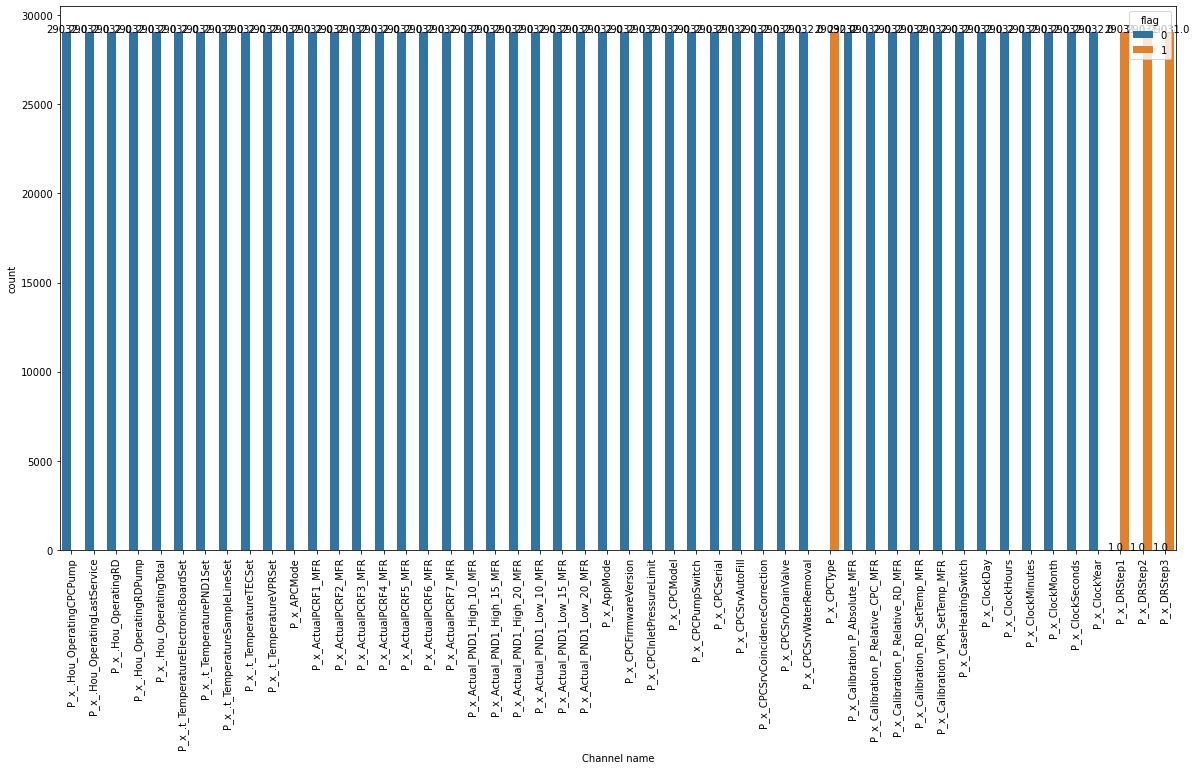

In [320]:
import seaborn as sns
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.grid(True) 
plt.xticks(rotation=90)
ax = sns.countplot(x="Channel name",hue="flag", data=out_of_range_df_1751400_SMGA_1) 

In [321]:
out_of_range_df_1751400_SMGA_1.shape

(1451600, 18)

In [322]:
out_of_range_df_1751400_SMGA_1 = pd.melt(df_1751400_SMGA, id_vars =['equipmentNumber'], value_vars = chnl_list[50:100])  
out_of_range_df_1751400_SMGA_1.rename(columns={'variable':'Channel name'},inplace=True) 
df_know_data.rename(columns={df_know_data.columns[0]:'Channel name'},inplace=True)
out_of_range_df_1751400_SMGA_1 = out_of_range_df_1751400_SMGA_1.merge(df_know_data, on = 'Channel name')
df_know_data.rename(columns={df_know_data.columns[0]:'Channel name'},inplace=True)
out_of_range_df_1751400_SMGA_1 = out_of_range_df_1751400_SMGA_1.merge(df_know_data, on = 'Channel name')
out_of_range_df_1751400_SMGA_1['flag'] = None
out_of_range_df_1751400_SMGA_1['flag'] = np.where((out_of_range_df_1751400_SMGA_1['value'] < out_of_range_df_1751400_SMGA_1[out_of_range_df_1751400_SMGA_1.columns[5]]) | (out_of_range_df_1751400_SMGA_1['value'] > out_of_range_df_1751400_SMGA_1[out_of_range_df_1751400_SMGA_1.columns[6]]),1,0) 


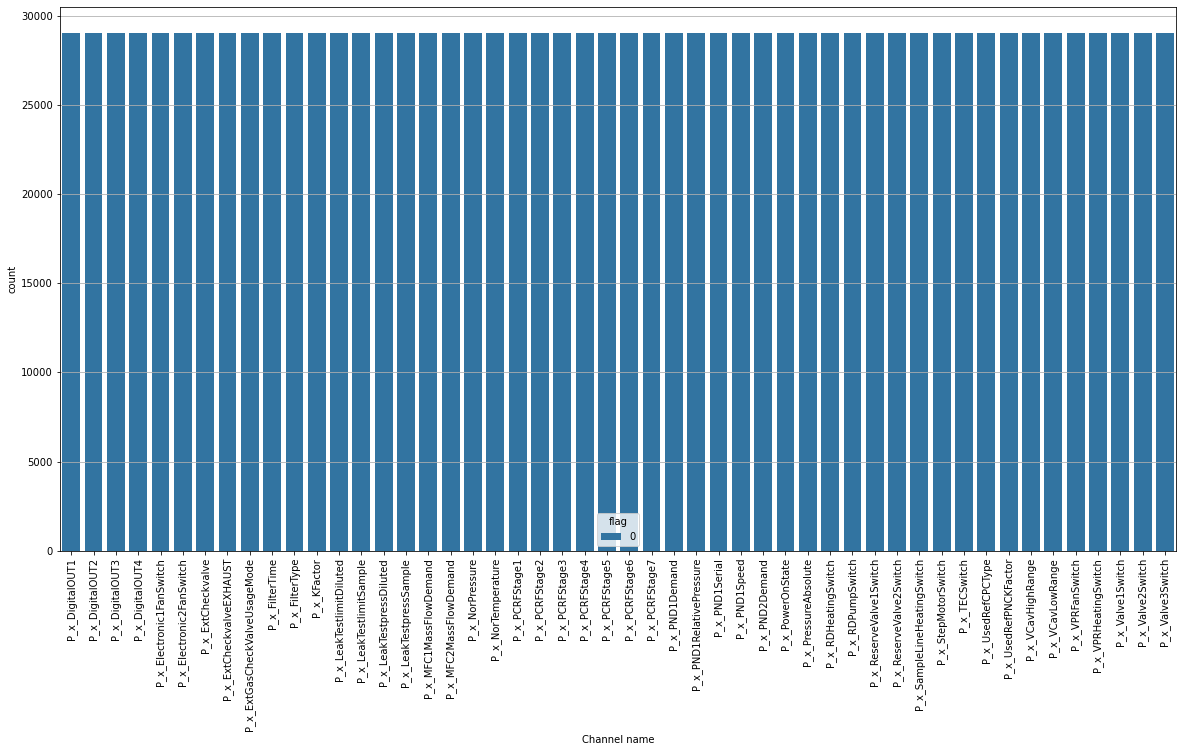

In [329]:
import seaborn as sns
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.grid(True) 
plt.xticks(rotation=90)
ax = sns.countplot(x="Channel name",hue="flag", data=out_of_range_df_1751400_SMGA_1) 

In [330]:
out_of_range_df_1751400_SMGA_1 = pd.melt(df_1751400_SMGA, id_vars =['equipmentNumber'], value_vars = chnl_list[100:150])  
out_of_range_df_1751400_SMGA_1.rename(columns={'variable':'Channel name'},inplace=True) 

In [331]:
out_of_range_df_1751400_SMGA_1.head() 
df_know_data.rename(columns={df_know_data.columns[0]:'Channel name'},inplace=True)
df_know_data.columns 

Index(['Channel name', ' Descriptive name', ' Value', ' Min.', ' Max.',
       ' Default', ' Unit', ' State '],
      dtype='object')

In [332]:
out_of_range_df_1751400_SMGA_1 = out_of_range_df_1751400_SMGA_1.merge(df_know_data, on = 'Channel name')
out_of_range_df_1751400_SMGA_1.head()

,equipmentNumber,Channel name,value,Descriptive name,Value,Min.,Max.,Default,Unit,State
0,1751400,P_x_Valve4Switch,1,Valve 4,On,0.0,1.0,Off,-,5
1,1751400,P_x_Valve4Switch,1,Valve 4,On,0.0,1.0,Off,-,5
2,1751400,P_x_Valve4Switch,1,Valve 4,On,0.0,1.0,Off,-,5
3,1751400,P_x_Valve4Switch,1,Valve 4,On,0.0,1.0,Off,-,5
4,1751400,P_x_Valve4Switch,1,Valve 4,On,0.0,1.0,Off,-,5


In [333]:
df_know_data.rename(columns={df_know_data.columns[0]:'Channel name'},inplace=True)
df_know_data.columns 
# out_of_range_df_1751400_SMGA_1 = out_of_range_df_1751400_SMGA_1.merge(df_know_data, on = 'Channel name')
# out_of_range_df_1751400_SMGA_1.head() 


Index(['Channel name', ' Descriptive name', ' Value', ' Min.', ' Max.',
       ' Default', ' Unit', ' State '],
      dtype='object')

In [334]:
out_of_range_df_1751400_SMGA_1 = out_of_range_df_1751400_SMGA_1.merge(df_know_data, on = 'Channel name')
out_of_range_df_1751400_SMGA_1.head() 


,equipmentNumber,Channel name,value,Descriptive name_x,Value_x,Min._x,Max._x,Default_x,Unit_x,State _x,Descriptive name_y,Value_y,Min._y,Max._y,Default_y,Unit_y,State _y
0,1751400,P_x_Valve4Switch,1,Valve 4,On,0.0,1.0,Off,-,5,Valve 4,On,0.0,1.0,Off,-,5
1,1751400,P_x_Valve4Switch,1,Valve 4,On,0.0,1.0,Off,-,5,Valve 4,On,0.0,1.0,Off,-,5
2,1751400,P_x_Valve4Switch,1,Valve 4,On,0.0,1.0,Off,-,5,Valve 4,On,0.0,1.0,Off,-,5
3,1751400,P_x_Valve4Switch,1,Valve 4,On,0.0,1.0,Off,-,5,Valve 4,On,0.0,1.0,Off,-,5
4,1751400,P_x_Valve4Switch,1,Valve 4,On,0.0,1.0,Off,-,5,Valve 4,On,0.0,1.0,Off,-,5


In [335]:
out_of_range_df_1751400_SMGA_1['flag'] = None
out_of_range_df_1751400_SMGA_1.columns[6] 

'\xa0Max._x'

In [336]:
out_of_range_df_1751400_SMGA_1['flag'] = np.where((out_of_range_df_1751400_SMGA_1['value'] < out_of_range_df_1751400_SMGA_1[out_of_range_df_1751400_SMGA_1.columns[5]]) | (out_of_range_df_1751400_SMGA_1['value'] > out_of_range_df_1751400_SMGA_1[out_of_range_df_1751400_SMGA_1.columns[6]]),1,0) 
# print("first 50 channels")

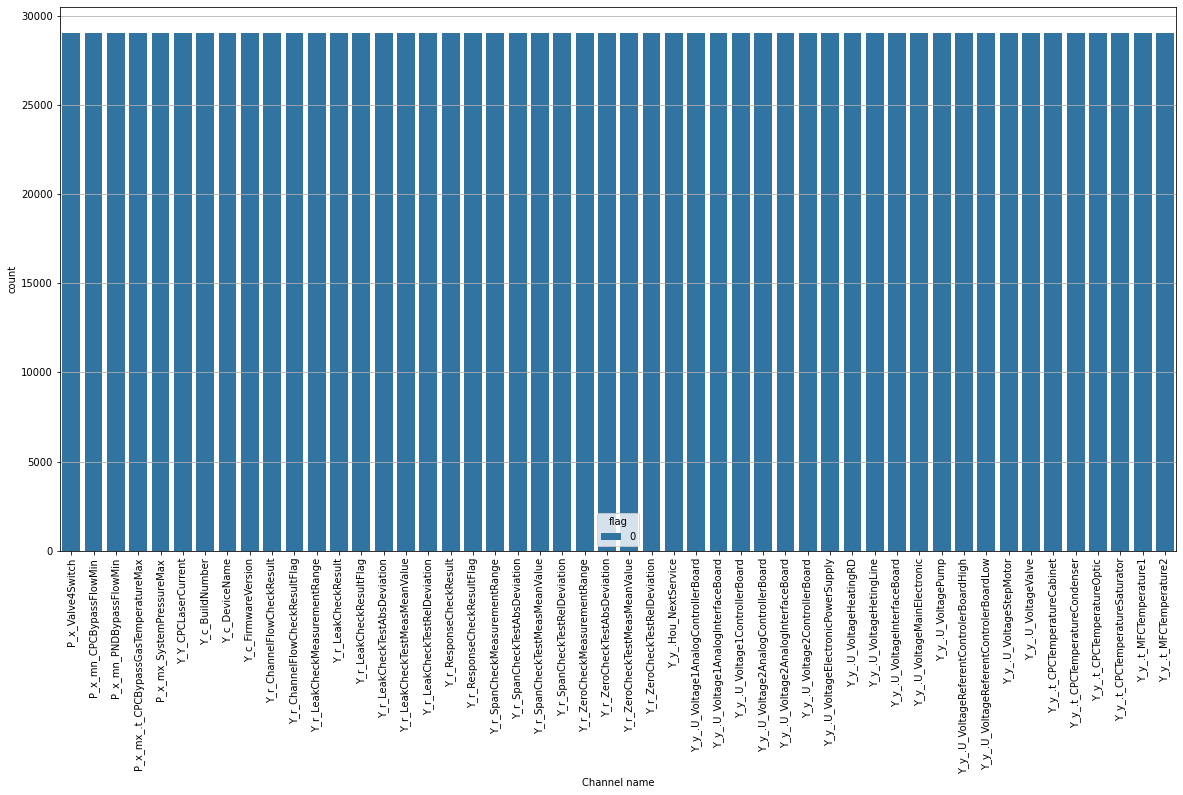

In [337]:
import seaborn as sns
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.grid(True) 
plt.xticks(rotation=90)
ax = sns.countplot(x="Channel name",hue="flag", data=out_of_range_df_1751400_SMGA_1) 

In [338]:
out_of_range_df_1751400_SMGA_1 = pd.melt(df_1751400_SMGA, id_vars =['equipmentNumber'], value_vars = chnl_list[150:200])  
out_of_range_df_1751400_SMGA_1.rename(columns={'variable':'Channel name'},inplace=True) 

In [339]:
df_know_data.rename(columns={df_know_data.columns[0]:'Channel name'},inplace=True)

In [340]:
out_of_range_df_1751400_SMGA_1 = out_of_range_df_1751400_SMGA_1.merge(df_know_data, on = 'Channel name')

In [341]:
df_know_data.rename(columns={df_know_data.columns[0]:'Channel name'},inplace=True)

In [342]:
out_of_range_df_1751400_SMGA_1 = out_of_range_df_1751400_SMGA_1.merge(df_know_data, on = 'Channel name')

In [343]:
out_of_range_df_1751400_SMGA_1['flag'] = None

In [344]:
out_of_range_df_1751400_SMGA_1['flag'] = np.where((out_of_range_df_1751400_SMGA_1['value'] < out_of_range_df_1751400_SMGA_1[out_of_range_df_1751400_SMGA_1.columns[5]]) | (out_of_range_df_1751400_SMGA_1['value'] > out_of_range_df_1751400_SMGA_1[out_of_range_df_1751400_SMGA_1.columns[6]]),1,0) 


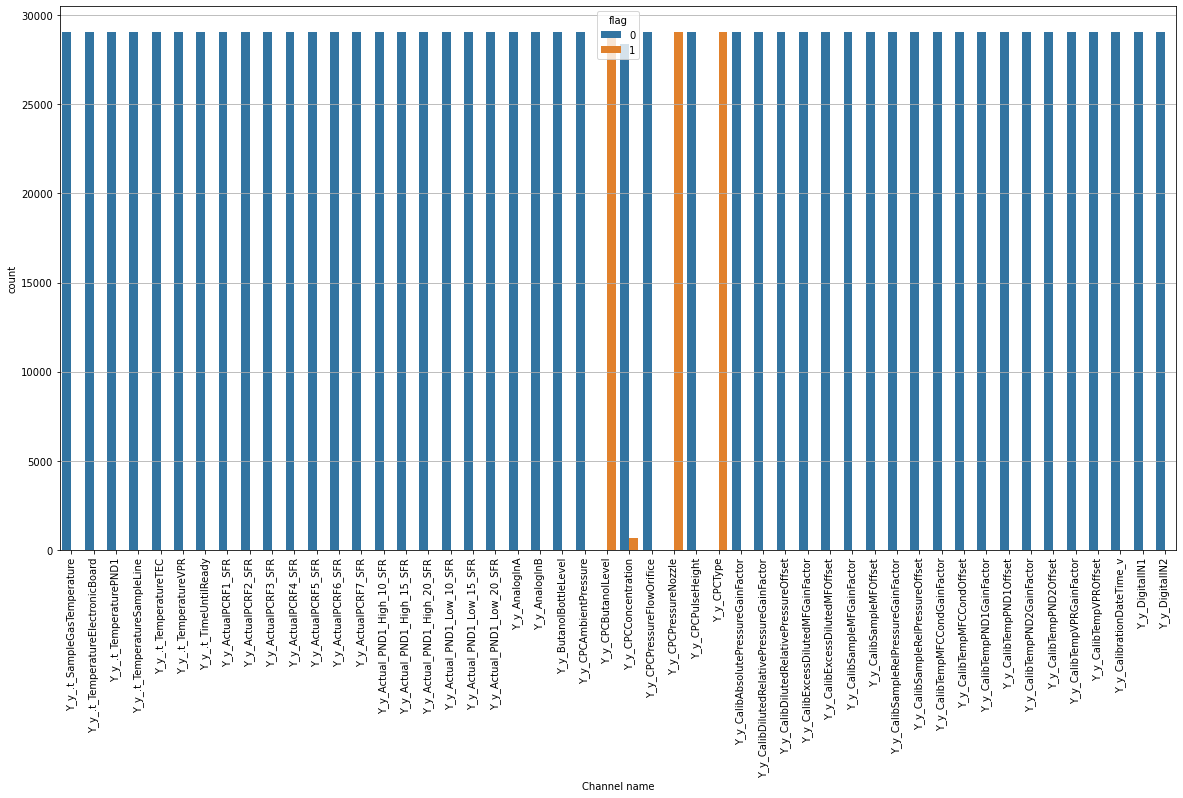

In [345]:
import seaborn as sns
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.grid(True) 
plt.xticks(rotation=90)
ax = sns.countplot(x="Channel name",hue="flag", data=out_of_range_df_1751400_SMGA_1) 

In [346]:
out_of_range_df_1751400_SMGA_1 = pd.melt(df_1751400_SMGA, id_vars =['equipmentNumber'], value_vars = chnl_list[200:250])  
out_of_range_df_1751400_SMGA_1.rename(columns={'variable':'Channel name'},inplace=True) 

In [347]:
df_know_data.rename(columns={df_know_data.columns[0]:'Channel name'},inplace=True)

In [348]:
out_of_range_df_1751400_SMGA_1 = out_of_range_df_1751400_SMGA_1.merge(df_know_data, on = 'Channel name')

In [349]:
df_know_data.rename(columns={df_know_data.columns[0]:'Channel name'},inplace=True)

In [350]:
out_of_range_df_1751400_SMGA_1 = out_of_range_df_1751400_SMGA_1.merge(df_know_data, on = 'Channel name')

In [351]:
out_of_range_df_1751400_SMGA_1['flag'] = None

In [352]:
out_of_range_df_1751400_SMGA_1['flag'] = np.where((out_of_range_df_1751400_SMGA_1['value'] < out_of_range_df_1751400_SMGA_1[out_of_range_df_1751400_SMGA_1.columns[5]]) | (out_of_range_df_1751400_SMGA_1['value'] > out_of_range_df_1751400_SMGA_1[out_of_range_df_1751400_SMGA_1.columns[6]]),1,0) 


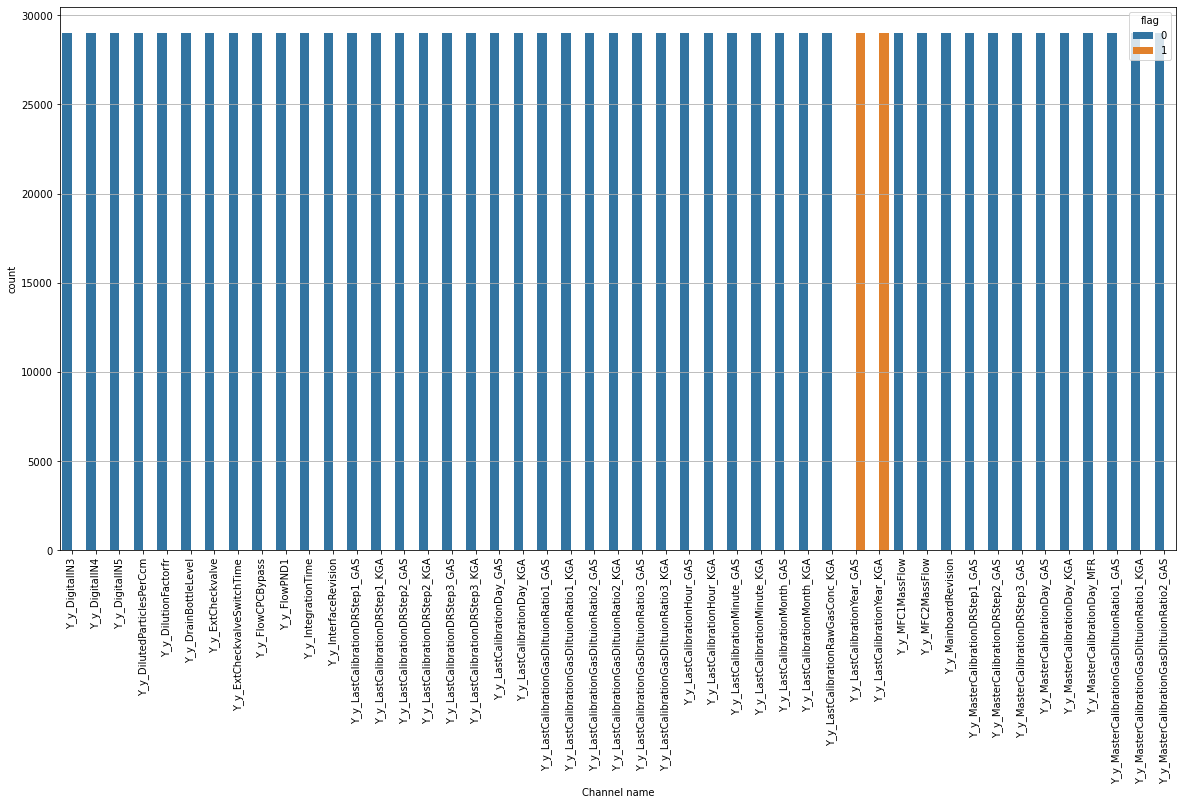

In [353]:
import seaborn as sns
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.grid(True) 
plt.xticks(rotation=90)
ax = sns.countplot(x="Channel name",hue="flag", data=out_of_range_df_1751400_SMGA_1) 

In [354]:
out_of_range_df_1751400_SMGA_1 = pd.melt(df_1751400_SMGA, id_vars =['equipmentNumber'], value_vars = chnl_list[250:300])  
out_of_range_df_1751400_SMGA_1.rename(columns={'variable':'Channel name'},inplace=True) 

In [355]:
df_know_data.rename(columns={df_know_data.columns[0]:'Channel name'},inplace=True)

In [356]:
out_of_range_df_1751400_SMGA_1 = out_of_range_df_1751400_SMGA_1.merge(df_know_data, on = 'Channel name')

In [357]:
df_know_data.rename(columns={df_know_data.columns[0]:'Channel name'},inplace=True)

In [358]:
out_of_range_df_1751400_SMGA_1 = out_of_range_df_1751400_SMGA_1.merge(df_know_data, on = 'Channel name')

In [359]:
out_of_range_df_1751400_SMGA_1['flag'] = None

In [360]:
out_of_range_df_1751400_SMGA_1['flag'] = np.where((out_of_range_df_1751400_SMGA_1['value'] < out_of_range_df_1751400_SMGA_1[out_of_range_df_1751400_SMGA_1.columns[5]]) | (out_of_range_df_1751400_SMGA_1['value'] > out_of_range_df_1751400_SMGA_1[out_of_range_df_1751400_SMGA_1.columns[6]]),1,0) 


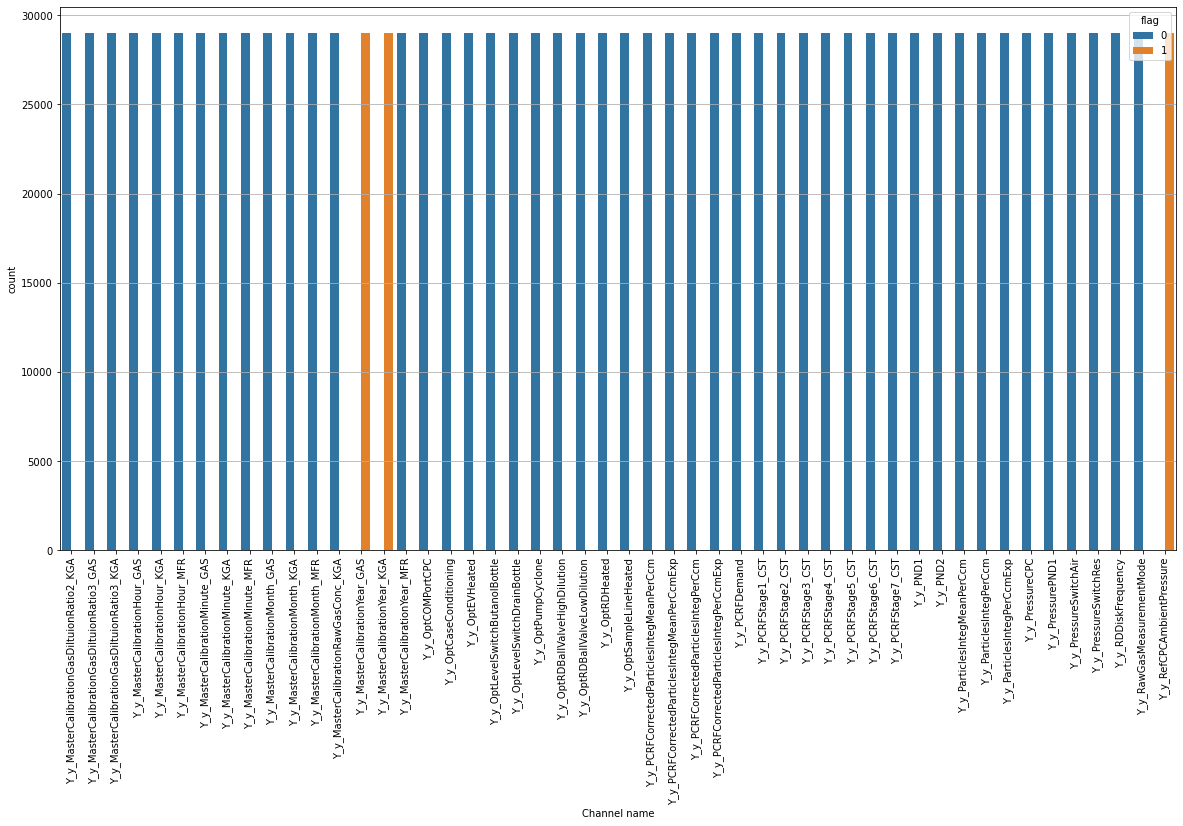

In [361]:
import seaborn as sns
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.grid(True) 
plt.xticks(rotation=90)
ax = sns.countplot(x="Channel name",hue="flag", data=out_of_range_df_1751400_SMGA_1) 